In [2]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import time
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
df=pd.DataFrame(data=faces.data,index=range(400))
print(df.shape)

(400, 4096)
(400, 4096)


In [4]:
df.head()

0         1         2         3         4         5         6     \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

       7         8         9     ...      4086      4087      4088      4089  \
0  0.677686  0.690083  0.685950  ...  0.665289  0.669421  0.652893  0.661157   
1  0.702479  0.710744  0.702479  ...  0.136364  0.157025  0.136364  0.148760   
2  0.685950  0.702479  0.698347  ...  0.074380  0.132231  0.181818  0.136364   
3  0.404959  0.483471  0.516529  ...  0.652893  0.636364  0.657025  0.685950   
4  0.714876  0.723140  0.731405  ...  0.190083  0.161157  0.177686  0.173554   

       4090      4091      4092      4093      4094      4095  
0  0.475207  0.132231  0.148760  0.152893  0.161157  0.157025  
1  0.152893  0.152893  0.152893  0.152893  0.152893  0.152893  
2  0.128099  0.148760  0.144628  0.140496  0.148760  0.152893  
3  0.727273  0.743802  0.764463  0.752066  0.752066  0.739669  
4  0.177686  0.177686  0.177686  0.177686  0.173554  0.173554  

[5 rows x 4096 columns]

0


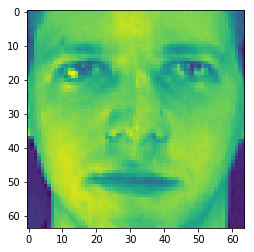

In [5]:
print(faces.target[0])
plt.imshow(faces.images[0])

In [6]:
print(faces.target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [7]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

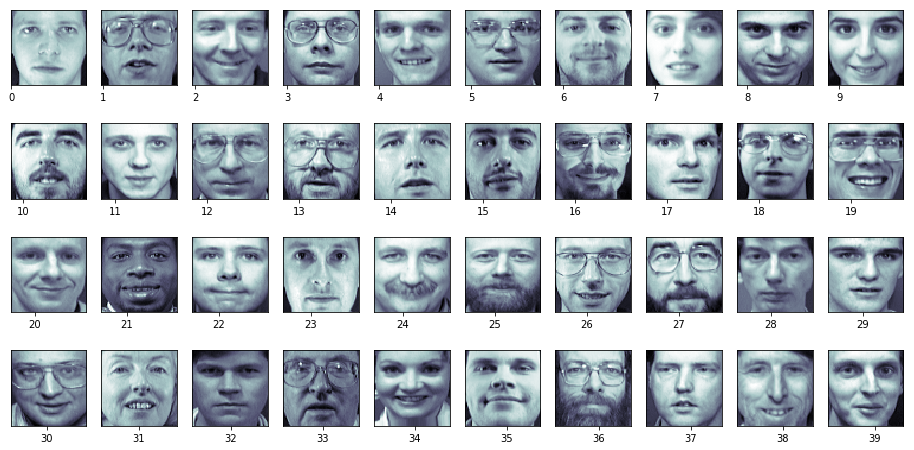

In [8]:
fig=plt.figure(figsize=(16,8))
for i in range(40):
    ax=fig.add_subplot(4,10,i+1,xticks=[i], yticks=[])
    ax.imshow(faces.images[i*10], cmap=plt.cm.bone)

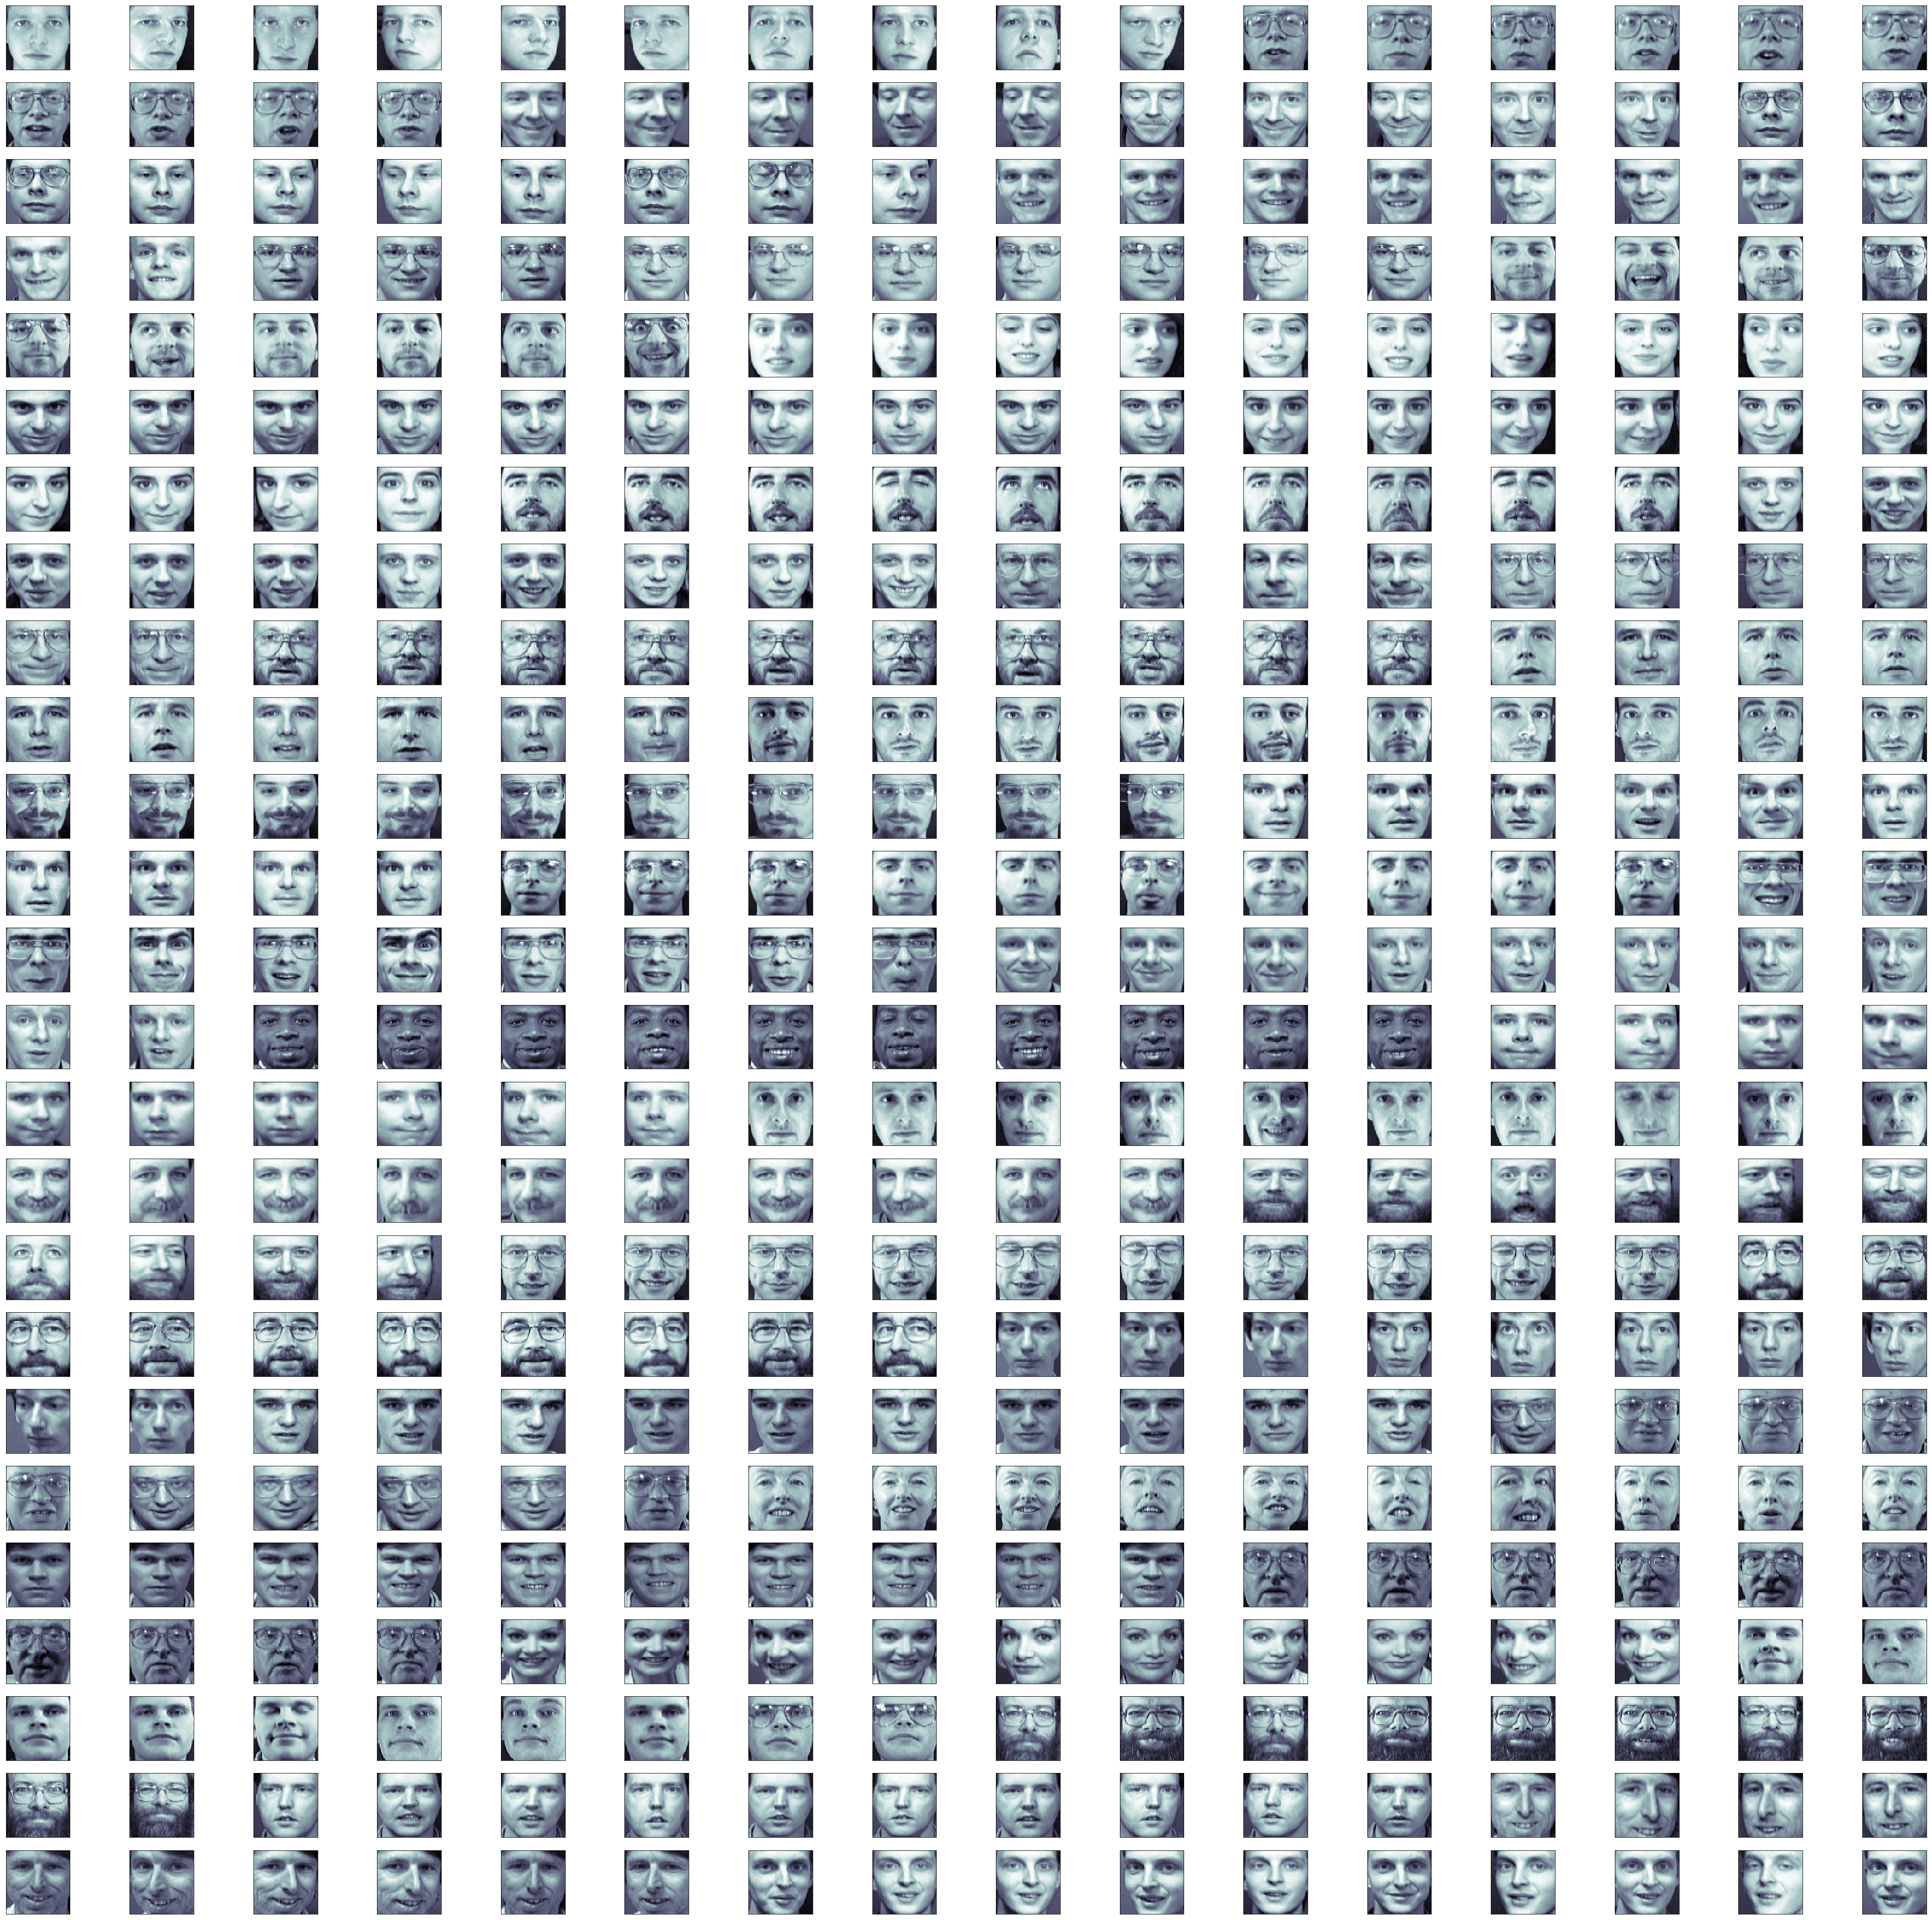

In [9]:
fig=plt.figure(figsize=(64,64))
for i in range(400):
    ax=fig.add_subplot(25,16,i+1,xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

from sklearn import decomposition
array1=np.zeros((4096,40))
k=0
for i in range(0,400,10):
    D=data[:,i:i+10]
    pca=decomposition.PCA(n_components=10, whiten=True)
    pca.fit(D)
    E=pca.fit_transform(D)
    k=k+1
    array1[:,k-1]=E[:,0]
    
   

In [10]:
#test, train, split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(faces.data,faces.target,test_size=0.33,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()
X_train=scl.fit_transform(x_train)
X_test=scl.transform(x_test)

C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py

--- 5.057409763336182 seconds---
[[6 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
[0.95       0.95       0.975      0.95       0.97142857 0.96774194
 0.95       1.         1.         1.        ]
0.9714170506912442
0.020765498657797702


C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


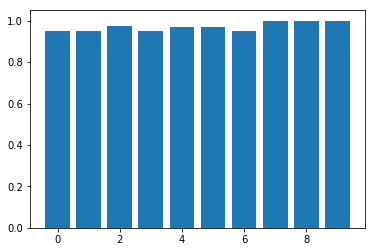

Accuracy 0.9242424242424242
Accuracy: 0.97 (+/- 0.04)


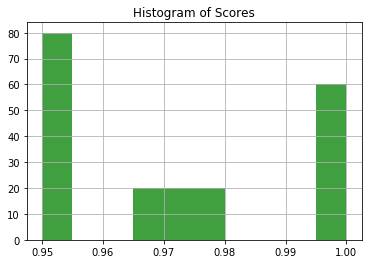

In [16]:
#1. Applying LDA 

start_time=time.time()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=2)
X_train_lda=lda.fit_transform(X_train,y_train)
X_test_lda=lda.transform(X_test)
y_pred_lda=lda.predict(X_test)

end_time=time.time()

scores = cross_val_score(lda, X_train, y_train, cv=10)
print("--- %s seconds---" % (time.time()-start_time))
print(confusion_matrix(y_test,y_pred_lda))
print(scores)
print(scores.mean())
print(scores.std()) #standart sapma ne kadar düşükse o kadar iyi.
#histogram
x= [x for x in range(len(scores))]
plt.bar(x, scores)
plt.show()

n, bins, patches = plt.hist(scores, 10, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.title('Histogram of Scores')
scores
print("Accuracy", metrics.accuracy_score(y_test, y_pred_lda))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

--- 7.781635284423828 seconds---
[[3 0 0 ... 0 0 1]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
0.9242424242424242
[0.85       0.85       0.9        0.875      0.91428571 0.93548387
 0.95       1.         1.         1.        ]
0.9274769585253455
0.056602433016145856


array([0.85      , 0.85      , 0.9       , 0.875     , 0.91428571,
       0.93548387, 0.95      , 1.        , 1.        , 1.        ])

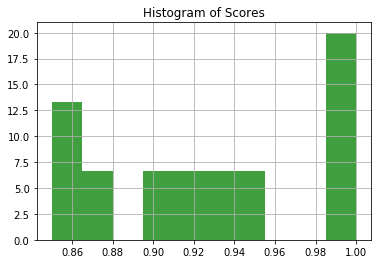

In [20]:
#1. Applying SVM rbf
from sklearn.model_selection import cross_val_score
start_time=time.time()
from sklearn.svm import SVC
svc_rbf=SVC(kernel='rbf')   #kernel linear, rbf vs...
svc_rbf.fit(X_train,y_train)
y_pred_svc_rbf=svc_rbf.predict(X_test)
end_time=time.time()
scores = cross_val_score(svc_rbf, X_train, y_train, cv=10)
print("--- %s seconds---" % (time.time()-start_time))
print(confusion_matrix(y_test,y_pred_svc_rbf))
print(lda.score(X_test,y_test))
print(scores)
print(scores.mean())
print(scores.std()) #standart sapma ne kadar düşükse o kadar iyi.
#histogram
n, bins, patches = plt.hist(scores, 10, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.title('Histogram of Scores')
scores
        

C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


--- 7.191675186157227 seconds---
[[6 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
[0.975      0.925      0.95       0.9        0.94285714 0.96774194
 0.95       1.         1.         1.        ]
0.9610599078341014
0.0322375263782582


array([0.975     , 0.925     , 0.95      , 0.9       , 0.94285714,
       0.96774194, 0.95      , 1.        , 1.        , 1.        ])

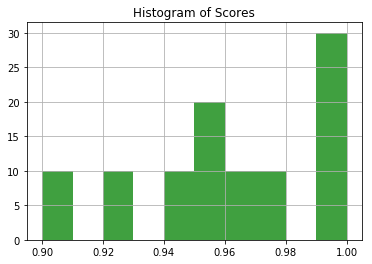

In [21]:
#1. Applying SVM linear
from sklearn.model_selection import cross_val_score
start_time=time.time()
from sklearn.svm import SVC
svc_linear=SVC(kernel='linear')   #kernel linear, rbf vs...
svc_linear.fit(X_train,y_train)
y_pred_svc_linear=svc_linear.predict(X_test)
end_time=time.time()
scores = cross_val_score(svc_linear, X_train, y_train, cv=10)
print("--- %s seconds---" % (time.time()-start_time))
print(confusion_matrix(y_test,y_pred_svc_linear))
print(scores)
print(scores.mean())
print(scores.std()) #standart sapma ne kadar düşükse o kadar iyi.
#histogram
n, bins, patches = plt.hist(scores, 10, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.title('Histogram of Scores')
scores

C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

--- 0.27419376373291016 seconds---
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0.125      0.175      0.2        0.25       0.22857143 0.16129032
 0.15       0.21428571 0.14285714 0.        ]
0.16470046082949308
0.06676344715120937


array([0.125     , 0.175     , 0.2       , 0.25      , 0.22857143,
       0.16129032, 0.15      , 0.21428571, 0.14285714, 0.        ])

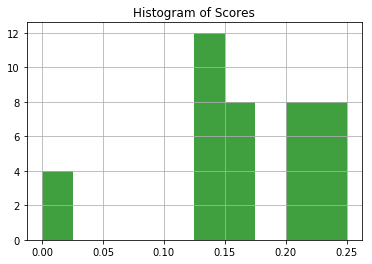

In [90]:
#applying SVM after PCA oke
from sklearn.model_selection import cross_val_score
start_time=time.time()
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='randomized',  whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
svc_rbf_pca=SVC(kernel='rbf')   #kernel linear, rbf vs...
svc_rbf_pca.fit(X_train_pca,y_train)
y_pred_svc_rbf_pca=svc_rbf_pca.predict(X_test_pca)
end_time=time.time()
scores = cross_val_score(svc_rbf_pca, X_train_pca, y_train, cv=10) #dikkat burada X_train değil X_train_pca olmalı değil mi...
print("--- %s seconds---" % (time.time()-start_time))
print(confusion_matrix(y_test,y_pred_svc_rbf_pca))
print(scores)
print(scores.mean())
print(scores.std()) #standart sapma ne kadar düşükse o kadar iyi.
#histogram
n, bins, patches = plt.hist(scores, 10, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.title('Histogram of Scores')
scores

C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma w

--- 0.4824643135070801 seconds---
[[6 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[0.875      0.9        0.9        0.9        0.94285714 0.96774194
 0.95       0.92857143 1.         1.        ]
0.9364170506912443
0.04135820987071878


C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Elif\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.875     , 0.9       , 0.9       , 0.9       , 0.94285714,
       0.96774194, 0.95      , 0.92857143, 1.        , 1.        ])

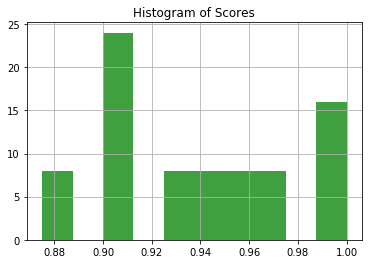

In [137]:
#applying SVM after PCA oke
from sklearn.model_selection import cross_val_score
start_time=time.time()
from sklearn.decomposition import PCA
pca = PCA(n_components=21, svd_solver='randomized',  whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
svc_rbf_pca2=SVC(kernel='rbf')   #kernel linear, rbf vs...
svc_rbf_pca2.fit(X_train_pca,y_train)
y_pred_svc_rbf_pca=svc_rbf_pca2.predict(X_test_pca)
end_time=time.time()
scores = cross_val_score(svc_rbf_pca2, X_train_pca, y_train, cv=10) #dikkat burada X_train değil X_train_pca olmalı değil mi...
print("--- %s seconds---" % (time.time()-start_time))
print(confusion_matrix(y_test,y_pred_svc_rbf_pca))
print(scores)
print(scores.mean())
print(scores.std()) #standart sapma ne kadar düşükse o kadar iyi.
#histogram
n, bins, patches = plt.hist(scores, 10, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.title('Histogram of Scores')
scores